In [99]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt

In [48]:
boston = load_boston()
feature_dataframe = pd.DataFrame(boston.data, columns=boston.feature_names)
target_dataframe = pd.DataFrame(boston.target, columns=["MEDV"])

In [49]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

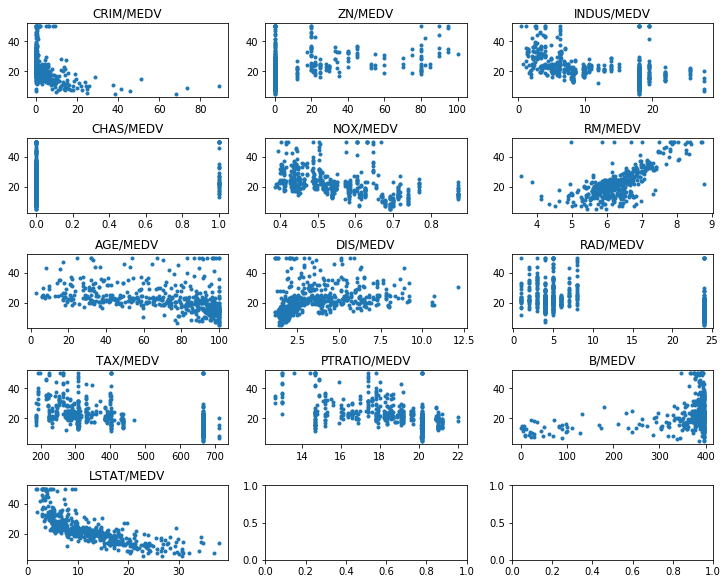

In [52]:
# define the figure size and grid layout properties
figsize = (10, 8)
cols = 3
rows = len(feature_dataframe.columns) // cols + 1
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)

for ax, f in zip(axs.flat, feature_dataframe.columns):
    ax.set_title("{}/MEDV".format(f))
    ax.plot(feature_dataframe[f], target_dataframe["MEDV"], '.')
plt.show()

In [57]:
offset = int(feature_dataframe.shape[0] * 0.9)
X_train, y_train = feature_dataframe[:offset], target_dataframe[:offset]
X_test, y_test = feature_dataframe[offset:], target_dataframe[offset:]

In [101]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train['MEDV'])
mse = mean_squared_error(y_test['MEDV'], clf.predict(X_test))
mae = mean_absolute_error(y_test['MEDV'], clf.predict(X_test))
r2 = r2_score(y_test['MEDV'], clf.predict(X_test))
print("MSE: %.4f" % mse, "MAE: %.4f" % mae, "R^2: %.4f" % r2, sep='\n')

MSE: 14.9854
MAE: 2.9056
R^2: 0.2079


In [102]:
import dill as pickle
filename = 'model_v2.pk'
with open(filename, 'wb') as file:
    pickle.dump(clf, file)

In [103]:
nj = X_test[:1].to_json(orient='records')

In [104]:
nj

'[{"CRIM":4.75237,"ZN":0.0,"INDUS":18.1,"CHAS":0.0,"NOX":0.713,"RM":6.525,"AGE":86.5,"DIS":2.4358,"RAD":24.0,"TAX":666.0,"PTRATIO":20.2,"B":50.92,"LSTAT":18.13}]'